<a href="https://colab.research.google.com/github/DSNortsev/CSE-694-Case-Studies-in-Deep-Learning/blob/master/Project/Final_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Plot histogram based on output value in train dataset

Total number of negative and positive cases: 
0.0    30074
1.0     3922
Name: output, dtype: int64


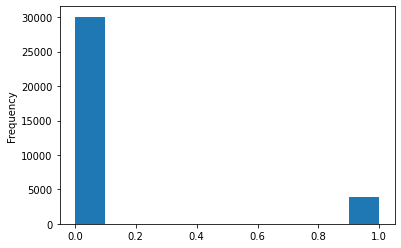

In [79]:
train_data = pd.read_csv("Research_data_train.csv")['output']
print('Total number of negative and positive cases: ',train_data.value_counts(), sep='\n')
train_data.plot.hist()

Plot histogram based on output value in predicted dataset

Total number of negative and positive cases: 
0    21560
1     4188
Name: output, dtype: int64


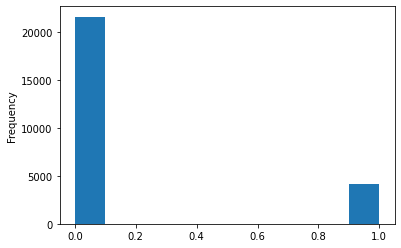

In [80]:
predicted_targets = pd.read_csv("final_result_Dmitry_Nortsev.csv")['output']
print('Total number of negative and positive cases: ', predicted_targets.value_counts(), sep='\n')
predicted_targets.plot.hist()

Plot histogram based on output value in actual output dataset

Total number of negative and positive cases: 
1    12874
0    12874
Name: output, dtype: int64


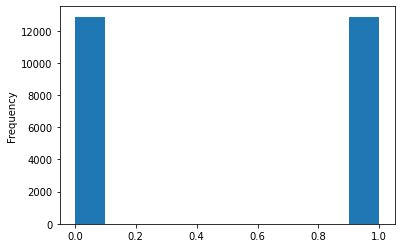

In [96]:
true_targets = pd.read_csv("Research_data_test_output.csv")['output']
print('Total number of negative and positive cases: ', true_targets.value_counts(), sep='\n')
true_targets.plot.hist()

From the plot above, we can see that total number of positive and negative cases are both equal to 12874 rows.

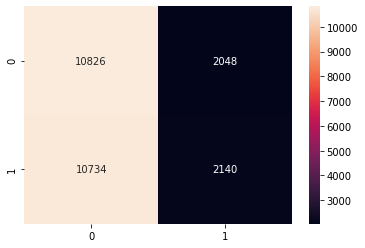

In [91]:
cm_2 = confusion_matrix(true_targets,predicted_targets)
sns.heatmap(cm_2,annot=True,fmt="d")

**Accuracy** is the percentage of examples correctly classified >
$ \frac{true\ samples}{total\ samles} $

In [95]:
from sklearn.metrics import accuracy_score
print(f'Accuracy of the model: {accuracy_score(true_targets, predicted_targets):.3f}')

Accuracy of the model: 0.504


From the confusion matrix above, we can see that our model did not perform well to predict positive cases. One of the main problem is that the model was trained on a data where only 11.5% of cases were negative and 88% are positives. The data was imbalanced, but for test data there are even number of postive and negative cases. 




**Precision** is the percentage of predicted positives that were correctly classified > $ \frac{true\ positive}{true\ positive\ +\ false\ positive} $

In [104]:
precision = precision_score(true_targets, predicted_targets, labels=[0,1], average='micro')
print(f'Precision: {precision:.3f}')

Precision: 0.504


**Recall** is the percentage of actual positives that were correctly classified > $ \frac{true\ positive}{true\ positive\ +\ false\ negative} $

In [107]:
recall = recall_score(true_targets, predicted_targets, average='binary')
print(f'Recall: {recall:.3f}')

Recall: 0.166


Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

**Precision:** Appropriate when minimizing false positives is the focus.
<br>
**Recall:** Appropriate when minimizing false negatives is the focus.

From the recall value, we can observe that our model did not handle well  postive cases.|


**F-Measure** provides a way to combine both precision and recall into a single measure that captures both properties.

Alone, neither precision or recall tells the whole story. We can have excellent precision with terrible recall, or alternately, terrible precision with excellent recall. F-measure provides a way to express both concerns with a single score.

$ F-score = \frac{2\ *\ Precision\ *\ Recall}{Precision\ +\ Recall} $


In [109]:
score = f1_score(true_targets, predicted_targets, average='binary')
print(f'F-Measure: {score:.3f}')

F-Measure: 0.251
